# Implementation of Neural Network Using NumPy

**DNN** (Deep Neural Network) in a machine learning algorithm that is inspired by the way the human brain works. **DNN** is mainly used as a classification algorithm. In this article, we will look at the stepwise approach on how to implement the basic **DNN** algorithm in NumPy from scratch.

The purpose of this article is to create a sense of understanding on how neural networks work and how to implement them. Firstly, we are going to build a three-letter (A, B, C) classifier. For simplicity, we are going to create the letters (A, B, C) as an array of 0s and 1s, and then we are going to ignore the bias term related with each node.

## Step 1: Create the Dataset

In [1]:
# A
a =[0, 0, 1, 1, 0, 0,
   0, 1, 0, 0, 1, 0,
   1, 1, 1, 1, 1, 1,
   1, 0, 0, 0, 0, 1,
   1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 1, 0,
   0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 0, 0, 0, 0,
   0, 1, 1, 1, 1, 0]
 
# Creating labels
y =[[1, 0, 0],
   [0, 1, 0],
   [0, 0, 1]]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

## Step 2: Visualization of the Dataset

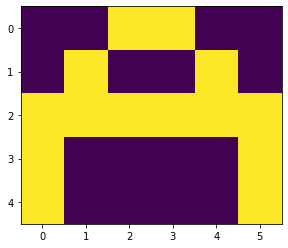

In [3]:
# visualize the data
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

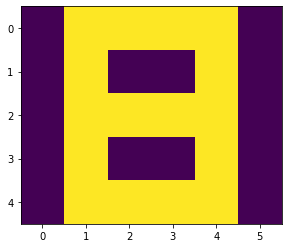

In [4]:
# visualize the data
plt.imshow(np.array(b).reshape(5, 6))
plt.show()

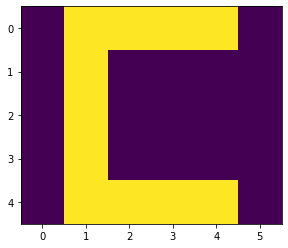

In [5]:
# visualize the data
plt.imshow(np.array(c).reshape(5, 6))
plt.show()

## Step 3: Convert Dataset into NumPy Array

In [6]:
# converting data and labels into numpy array
"""
Convert the matrix of 0 and 1 into one hot vector so that we can directly feed it
to the neural network, then store in a list 'x'.
"""

x = [np.array(a).reshape(1, 30),
     np.array(b).reshape(1, 30),
     np.array(c).reshape(1, 30)]

y = np.array(y)

print(x, '\n\n', y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


## Step 4: Define the Architecture or Structure

In [7]:
Image(url="https://media.geeksforgeeks.org/wp-content/uploads/20200522110034/NURELNETWORK.jpg", width=500)

1. Input layer (1, 30)
2. Hidden layer (1, 5)
3. Output layer (1, 3)

## Step 5: Declare and Define the _DNN_ Build

In [8]:
# activation function
def sigmoid(x):
    return(1/(1 + np.exp(-x)))

In [9]:
# initialize weights randomly
def generate_wt(x, y):
    l =[]
    for i in range(x * y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x, y))

In [10]:
# per input layer(1, 30)
# per hidden layer (1, 5)
# per output layer(3, 3)

# feed forward
def f_forward(x, w1, w2):
    
    # hidden
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
     
    # output
    z2 = a1.dot(w2)# input of layer out
    a2 = sigmoid(z2)# output of layer out
    
    return(a2)

In [11]:
# for loss we will be using mean square error (MSE)
def loss(out, y):
    s =(np.square(out-y))
    s = np.sum(s)/len(y)
    return(s)
   
# back propagation of error
# bias is not accounted for here
def back_prop(x, y, w1, w2, alpha):
     
    # hidden layer
    z1 = x.dot(w1)# input from layer 1
    a1 = sigmoid(z1)# output of layer 2
     
    # Output layer
    z2 = a1.dot(w2)# input of layer out
    a2 = sigmoid(z2)# output of layer out
    
    # error in output layer, MSE loss function
    d2 = (a2-y)
    d1 = np.multiply(
        ( w2.dot(( d2.transpose() )) ).transpose(), ( np.multiply(a1, 1-a1) ))
        # (w2*d2)(a1*[1-a1])
 
    # gradient for w1 and w2
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)
     
    # updating parameters with alpha as learning rate
    w1 = w1-(alpha*(w1_adj))
    w2 = w2-(alpha*(w2_adj))
     
    return(w1, w2)

In [12]:
def train(x, y, w1, w2, alpha = 0.01, epoch = 10):
    
    acc =[]
    loss =[]
    
    for j in range(epoch):
        
        l =[]
        
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
            
        print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
        
        acc.append((1-(sum(l)/len(x)))*100)
        loss.append(sum(l)/len(x))
        
    return(acc, loss, w1, w2)

In [13]:
def predict(x, w1, w2):
    
    out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    
    for i in range(len(out[0])):
        if(maxm < out[0][i]):
            maxm = Out[0][i]
            k = i
            
    if(k == 0):
        print("Image is of letter A.")
    elif(k == 1): 
        print("Image is of letter B.")
    else:
        print("Image is of letter C.")
              
    plt.imshow(x.reshape(5, 6))
    plt.show()

## Step 6: Initialize the Weights

Neural network with 3 layers requires 2 weight matrices.

In [14]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)

print(w1, "\n\n", w2)

[[ 0.48769814 -0.3239676  -0.34137962 -1.32478033 -0.10638146]
 [ 0.24135471 -0.5150272  -2.19230123  1.46081296 -0.37717533]
 [ 1.62438048  0.87486725 -1.359219    1.14713291 -1.30322137]
 [ 0.41746464 -0.89929387  3.54630464  1.15814268  0.31419644]
 [ 0.93368354 -1.40974963 -0.04166022 -0.31102126  0.30884097]
 [-0.16324748  0.89738385 -1.4883138  -0.65741585 -1.15642332]
 [ 0.68576096  0.50471349  0.5469892   0.05727649 -1.07518651]
 [-1.4475785   2.02471876 -1.62572685 -0.2422066  -0.0721306 ]
 [ 0.14199868 -2.5365961  -0.70343391  1.44121555 -1.25327579]
 [ 0.29822373  0.30507892  0.26937885 -0.45835978 -1.05224493]
 [ 0.69256723 -0.76106848  1.92806843  0.02018976 -1.46374691]
 [ 1.34612117 -2.21428517 -0.38445287  0.07310987 -0.03340263]
 [-1.32827872  2.16842135 -0.57135327  1.30183014  1.04263373]
 [-0.33810772 -0.20792254 -0.54418727  1.47552322  0.74440938]
 [-1.55702888  0.03527743  0.61102828  0.68101758  1.04619373]
 [ 1.47954398  0.5661026  -0.5309299  -0.50907828 -0.15

## Step 7: Train the Model

In [15]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
# of epochss. The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2."""
 
acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)

TypeError: 'list' object is not callable